# Setup and Data Exploration - AI vs Human Text Classification

### First we will start by setting up the environment and loading the raw dataset. After that we will perform some advance exploratory data analysis to understand the nature of the dataset.

## Setting up The environment and loading the data

In [1]:
!pip install nltk spacy --quiet
!python -m spacy download en_core_web_sm --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import spacy

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_Human.csv')

print("\nDataset shape:", raw_df.shape)
print("\nColumns:", raw_df.columns)
print("\n=== Info ===")
raw_df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset shape: (487235, 2)

Columns: Index(['text', 'generated'], dtype='object')

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [4]:
print("\n=== head ===")
raw_df.head()


=== head ===


,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [5]:
# Checking if any data is missing:

# Checking for empty rows in the DataFrame
empty_rows = raw_df.isnull().any(axis=1) | (raw_df == '').any(axis=1)

# Counting empty rows
num_empty_rows = empty_rows.sum()

print(f"Number of empty rows: {num_empty_rows}")

if num_empty_rows > 0:
    print("Empty rows found at indices:")
    print(raw_df[empty_rows].index.tolist())
else:
    print("No empty rows found.")

Number of empty rows: 0
No empty rows found.


## Exploratory Data Analysis (EDA)

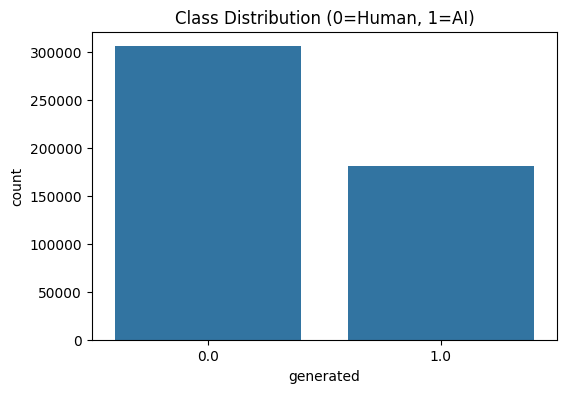

In [6]:
# 1. Class distribution

plt.figure(figsize=(6,4))
sns.countplot(data=raw_df, x='generated')
plt.title("Class Distribution (0=Human, 1=AI)")
plt.show()

From the plot it should be noted that the dataset is imbalanced. There are significantly more human generated texts than AI generated ones.

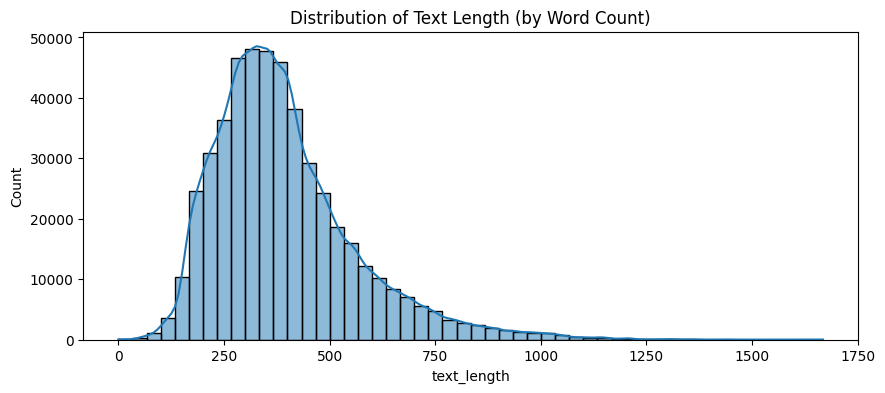

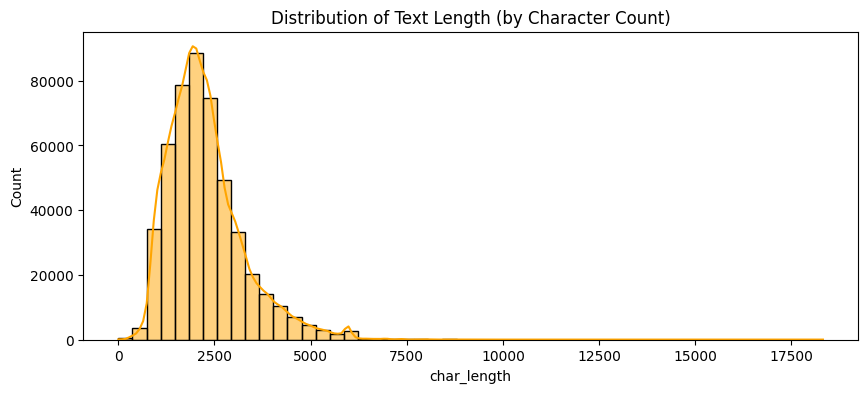

In [7]:
# 2. Text Length Distribution

raw_df['text_length'] = raw_df['text'].apply(lambda x: len(str(x).split()))
raw_df['char_length'] = raw_df['text'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10,4))
sns.histplot(raw_df['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Length (by Word Count)")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(raw_df['char_length'], bins=50, kde=True, color='orange')
plt.title("Distribution of Text Length (by Character Count)")
plt.show()

The above graph indicates that most of the texts are relatively short. However, this does not provide any insight about the difference in text lenght of Human generated Texts and AI generated Texts. Lets find that out next!

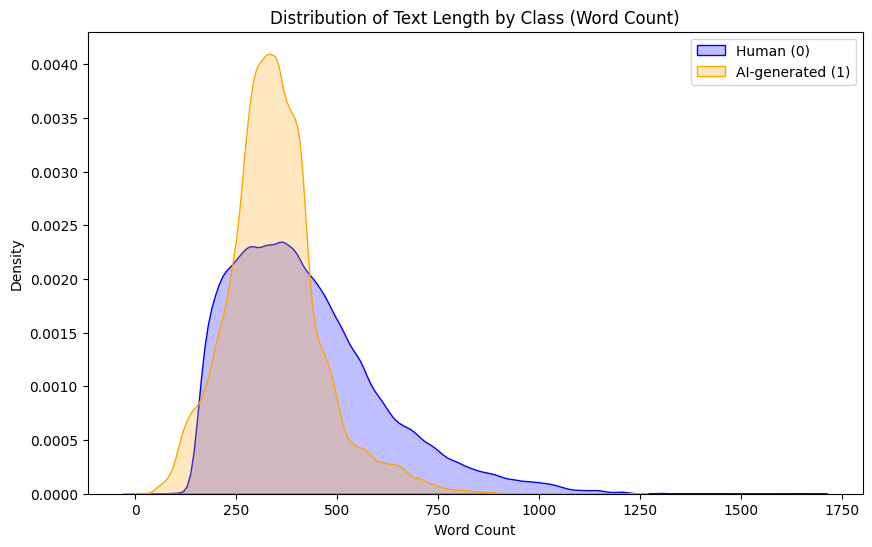

In [8]:
# 3. Distribution of Text Length by Class (Word Count)

raw_df['word_count'] = raw_df['text'].astype(str).apply(lambda x: len(x.split()))

human_text_lengths = raw_df[raw_df['generated'] == 0]['word_count']
ai_text_lengths = raw_df[raw_df['generated'] == 1]['word_count']

plt.figure(figsize=(10, 6))

# Plot KDE for human-generated texts
sns.kdeplot(human_text_lengths, label='Human (0)', fill=True, color='blue', common_norm=False)

# Plot KDE for AI-generated texts
sns.kdeplot(ai_text_lengths, label='AI-generated (1)', fill=True, color='orange', common_norm=False)

plt.title("Distribution of Text Length by Class (Word Count)")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.legend()
plt.show()

The plot shows that length could be a distinguishing feature of the two classes. While AI-generated texts are long, many were shorter and more closely clustered than human-generated texts and this might be a pattern in the distribution that our baseline model might learn.

We also need to perform some exploratory data analysis based on the vocabulary of the Human/AI generated text. However, before that we will need to lowercase, remove punctuations and tokenize. So lets do the preprocessing first before coming back to analyze the vocabulary

## Preprocessing Pipeline

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

In [10]:
# Applying the preprocessing on the raw dataset

df_toProcess = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_Human.csv')

print("Applying preprocessing to the 'text' column...")
# Uncomment the line below to apply preprocessing again!
# df_toProcess['processed_text'] = df_toProcess['text'].apply(preprocess_text)
print("Preprocessing complete. A new column 'processed_text' has been added.")

Applying preprocessing to the 'text' column...
Preprocessing complete. A new column 'processed_text' has been added.


In [11]:
# Uncomment the entire cell to drop the text column before saving again if applying preprocessing again

# # Dropping the 'text' column from df_toProcess before saving the preprocessed data

# if 'text' in df_toProcess.columns:
#     df_toProcess = df_toProcess.drop(columns=['text'])
#     print("'text' column dropped successfully.")
# else:
#     print("No 'text' column found in df_processed.")

In [12]:
# Saving the preprocessed file for further use

output_file_path = '/content/drive/MyDrive/Colab Notebooks/AI_Human_processed.csv'

# Uncomment the line below to save the newly preprocessed file on drive
# df_toProcess.to_csv(output_file_path, index=False)
print(f"Processed DataFrame saved successfully to: {output_file_path}")

Processed DataFrame saved successfully to: /content/drive/MyDrive/Colab Notebooks/AI_Human_processed.csv


## Exploratory Data Analysis of vocabulary on preprocessed data

In [3]:
# Code to load the preprocessed file

from google.colab import drive
drive.mount('/content/drive')

df_processed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_Human_processed.csv')

df_processed.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,generated,processed_text
0,0.0,car car around since became famous 1900s henry...
1,0.0,transportation large necessity country worldwi...
2,0.0,`` america 's love affair 's vehicle seems coo...
3,0.0,often ride car drive one motor vehicle work st...
4,0.0,car wonderful thing perhaps one world greatest...


In [14]:
# Step 1: Identify rows with NaN or empty strings in df_processed
empty_rows = df_processed.isnull().any(axis=1) | (df_processed == '').any(axis=1)
num_empty_rows = empty_rows.sum()
print(f"Number of empty rows: {num_empty_rows}")
print(f"\ndf_processed shape: {df_processed.shape}")

# Step 2: Show and drop those rows from df_processed
if num_empty_rows > 0:
    print("Problematic rows before dropping:")
    print(df_processed[empty_rows])

    # Drop and reset index
    df_processed = df_processed[~empty_rows].reset_index(drop=True)
    print(f"\nCleaned df_processed. New shape: {df_processed.shape}")
else:
    print("No empty rows found in df_processed.")


Number of empty rows: 5

df_processed shape: (487235, 2)
Problematic rows before dropping:
       generated processed_text
2384         1.0            NaN
77765        1.0            NaN
78110        1.0            NaN
78298        1.0            NaN
81000        1.0            NaN

Cleaned df_processed. New shape: (487230, 2)


This is probably due to preprocessing. For simplicity we will just remove the problametic rows for now.

### Here we will do the TF-IDF vectorization first so that we can do Vocabulary Data analysis using TFIDF and then we will vectorize again without max_feature=5000 for model training

In [15]:
# TF-IDF Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer

# Using 'processed_text' column for vectorization
vectorizer = TfidfVectorizer(max_features=5000)

A = vectorizer.fit_transform(df_processed['processed_text'])
b = df_processed['generated']

print("TF-IDF matrix shape:", A.shape)


TF-IDF matrix shape: (487230, 5000)


In [16]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create masks
human_mask = df_processed['generated'] == 0
ai_mask = df_processed['generated'] == 1

# Use .values to ensure compatibility with sparse matrix indexing
human_tfidf_avg = A[human_mask.values].mean(axis=0).A1
ai_tfidf_avg = A[ai_mask.values].mean(axis=0).A1

# Create top words DataFrames
human_top_words = pd.DataFrame({
    'word': feature_names,
    'tfidf': human_tfidf_avg
}).sort_values(by='tfidf', ascending=False).head(10)

ai_top_words = pd.DataFrame({
    'word': feature_names,
    'tfidf': ai_tfidf_avg
}).sort_values(by='tfidf', ascending=False).head(10)

print("Top 10 TF-IDF words in human-generated texts:")
print(human_top_words)

print("\nTop 10 TF-IDF words in AI-generated texts:")
print(ai_top_words)


Top 10 TF-IDF words in human-generated texts:
           word     tfidf
768         car  0.080914
4265    student  0.074149
4950      would  0.049274
3305     people  0.045718
3912     school  0.043886
4807       vote  0.041355
1563  electoral  0.036167
4760      venus  0.034001
3338      phone  0.031169
1128      could  0.029981

Top 10 TF-IDF words in AI-generated texts:
           word     tfidf
4265    student  0.055460
768         car  0.043421
1563  electoral  0.036258
947     college  0.031461
4807       vote  0.025852
3305     people  0.024928
2235       help  0.024233
2711       like  0.024108
4209      state  0.024108
3912     school  0.024092


## Implementing baseline Model

In [17]:
# TF-IDF Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer

# Using 'processed_text' column for vectorization
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df_processed['processed_text'])
y = df_processed['generated']

print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (487230, 250593)


In [18]:
# Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state= None, stratify=y
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (389784, 250593)
Test size: (97446, 250593)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [20]:
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

print("\nNaive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))

print("\nBaseline Accuracy Scores:")
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes:", accuracy_score(y_test, y_pred_nb))

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     61159
         1.0       0.99      0.99      0.99     36287

    accuracy                           0.99     97446
   macro avg       0.99      0.99      0.99     97446
weighted avg       0.99      0.99      0.99     97446


Naive Bayes Performance:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     61159
         1.0       0.98      0.89      0.93     36287

    accuracy                           0.95     97446
   macro avg       0.96      0.94      0.95     97446
weighted avg       0.95      0.95      0.95     97446


Baseline Accuracy Scores:
Logistic Regression: 0.9928986310366767
Naive Bayes: 0.9517065862118507


As we can see we got a very high Accuracy and precision. But we suspect that the model might me biasing on the basis of text lenght. To avoid model biasing based on text lenght lets try to keep only the texts which have same lenght and also balance out the classes.

# Making it harder

## Now lets balance out the classes and only gather the texts that have equal length

In [5]:
from collections import Counter

# add word count column in the processed dataframe
df_processed['word_count'] = df_processed['processed_text'].astype(str).apply(lambda x: len(x.split()))

# separating human and AI texts
human_df = df_processed[df_processed['generated'] == 0]
ai_df = df_processed[df_processed['generated'] == 1]

# finding common word counts
human_counts = Counter(human_df['word_count'])
ai_counts = Counter(ai_df['word_count'])

# only keeping word counts that exist in both and have at least one sample each
common_lengths = set(human_counts.keys()).intersection(ai_counts.keys())

# balancing both datasets based on minimum counts per common word length
balanced_rows = []

for wc in common_lengths:
    min_count = min(human_counts[wc], ai_counts[wc])

    # Sampling equal number from both classes
    human_subset = human_df[human_df['word_count'] == wc].sample(n=min_count, random_state=42)
    ai_subset = ai_df[ai_df['word_count'] == wc].sample(n=min_count, random_state=42)

    balanced_rows.extend([human_subset, ai_subset])

# putting it all together
balanced_df = pd.concat(balanced_rows).reset_index(drop=True)

print("Balanced dataset shape:", balanced_df.shape)
print(balanced_df['generated'].value_counts())


Balanced dataset shape: (352322, 3)
generated
0.0    176161
1.0    176161
Name: count, dtype: int64


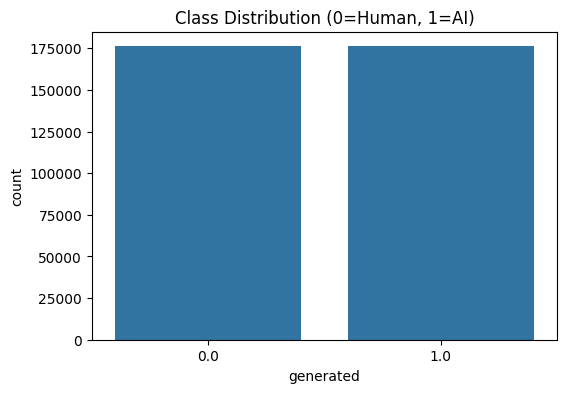

In [7]:
# Showing class distribution again:

plt.figure(figsize=(6,4))
sns.countplot(data=balanced_df, x='generated')
plt.title("Class Distribution (0=Human, 1=AI)")
plt.show()

Classes are no balanced

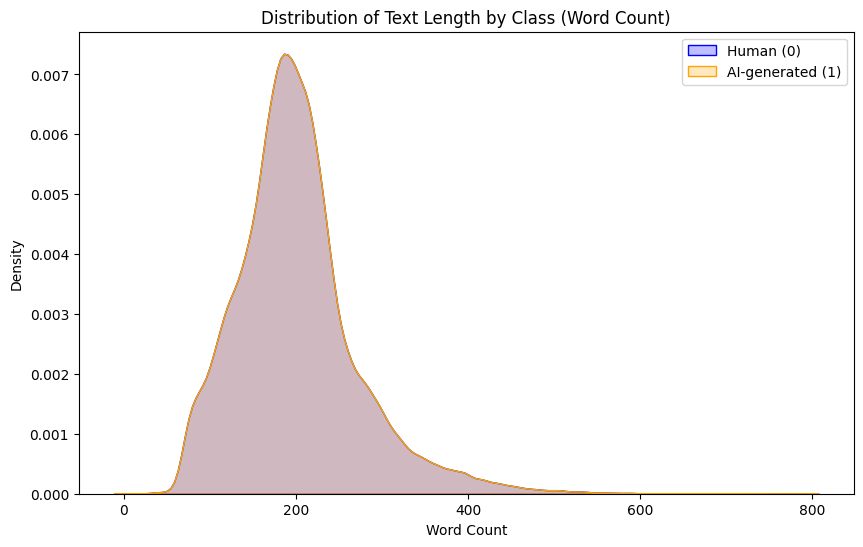

In [8]:
# showing the distribution of Text Length by Class (Word Count) again:

human_text_lengths = balanced_df[balanced_df['generated'] == 0]['word_count']
ai_text_lengths = balanced_df[balanced_df['generated'] == 1]['word_count']

plt.figure(figsize=(10, 6))

# Plot KDE for human-generated texts
sns.kdeplot(human_text_lengths, label='Human (0)', fill=True, color='blue', common_norm=False)

# Plot KDE for AI-generated texts
sns.kdeplot(ai_text_lengths, label='AI-generated (1)', fill=True, color='orange', common_norm=False)

plt.title("Distribution of Text Length by Class (Word Count)")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.legend()
plt.show()

The Distibution of Text Length by class is also equal. The model should not be biasing any more on the basis of Text lenght.

Now that this is equal, lets try again

In [9]:
# TF-IDF Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer

# Using 'processed_text' column for vectorization
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(balanced_df['processed_text'])
y = df_processed['generated']

print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (352322, 212213)


In [10]:
# Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, balanced_df['generated'], test_size=0.2, random_state= 42, stratify=balanced_df['generated']
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (281857, 212213)
Test size: (70465, 212213)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [12]:
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

print("\nNaive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))

print("\nBaseline Accuracy Scores:")
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes:", accuracy_score(y_test, y_pred_nb))

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     35233
         1.0       0.99      0.99      0.99     35232

    accuracy                           0.99     70465
   macro avg       0.99      0.99      0.99     70465
weighted avg       0.99      0.99      0.99     70465


Naive Bayes Performance:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     35233
         1.0       0.97      0.94      0.96     35232

    accuracy                           0.96     70465
   macro avg       0.96      0.96      0.96     70465
weighted avg       0.96      0.96      0.96     70465


Baseline Accuracy Scores:
Logistic Regression: 0.9916838146597602
Naive Bayes: 0.9565883772085433


As we can see the Accuracy and Precision are still very high and interestingly almost same. This indicates that the model is infact not biasing, however, making sure of it was necessary.

# SEA 820 Final Project – Project Plan (Week 2–3)

**Project Title:** Detecting AI-Generated Text  
**Team Members:** Mohammed Aeraf Khan, Madhur Saluja  
**Duration:** Week 2 to Week 3  
**Deliverables:** Fine-tuned Transformer model, performance comparison, error analysis, ethical discussion, final report, and presentation

## Week 2 Goals – Model Development & Evaluation

**Objective:** Fine-tune a Transformer model (DistilBERT) and compare it with the baseline (Logistic Regression and Naive Bayes).

| Task | Member | Details |
|---|---|---|
| Load data using Hugging Face | Aeraf | Format `balanced_df` and split into train/test/validation sets |
| Tokenize with DistilBERT | Aeraf | Use `AutoTokenizer` and apply preprocessing with `map()` pipeline |
| Fine-tune DistilBERT | Madhur | Use Hugging Face `Trainer` API with tuned hyperparameters |
| Evaluate Transformer model | Madhur | Calculate accuracy, precision, recall, F1-score; generate comparison |
| Begin initial report documentation | Both | Start drafting experiment setup and recording early observations |

## Week 3 Goals – Analysis, Reporting & Presentation

**Objective:** Finalize analysis, documentation, and presentation of project outcomes.

| Task | Member | Details |
|---|---|---|
| Error analysis | Aeraf | Examine wrongly classified examples and pattern itendification |
| Ethical implications | Madhur | Discuss risks (e.g., bias, misuse) in the detection system |
| Report writing | Both | Compile methodology, results, visualizations, and analysis |
| Presentation prep | Both | Create 5–7 minute slide to summarize key project insights |
| Code & repo cleanup | Aeraf | Finalize notebooks and write README for GitHub submission |

## Milestones & Deadlines

- **Baseline Model Completed** – Week 1  
- **Transformer Fine-tuning & Evaluation** – _End of Week 2_  
- **Final Report, Slides, and Code Submission** – _End of Week 3_
